In [13]:
flow_packets = []
with open("/mnt/extra/datasets/processed/wednesday_rerun_test_index.txt") as file:
    for line in file:
        indexes = line.strip().split(",")
        if len(indexes[-1]) == 0:
            indexes = indexes[:-1]
        indexes = [int(x) for x in indexes]
        flow_packets.append(indexes)

In [14]:
flow_packets

[[160, 161],
 [226, 234],
 [563, 564],
 [53, 13690, 55, 13697],
 [52, 13684, 54, 13693],
 [50, 13686, 51, 13692],
 [44, 13685, 47, 13689],
 [40, 13680, 49, 13688],
 [41, 13679, 48, 13687],
 [43, 13676, 45, 13683],
 [39, 13675, 46, 13681],
 [37, 13673, 42, 13682],
 [33, 13672, 38, 13678],
 [30, 13670, 36, 13677],
 [31, 13665, 35, 13674],
 [28, 13664, 34, 13668],
 [27, 13666, 32, 13671],
 [24, 13660, 29, 13669],
 [23, 13657, 26, 13663],
 [19, 13658, 25, 13667],
 [17, 13655, 22, 13662],
 [14, 13653, 21, 13661],
 [15, 13649, 20, 13659],
 [13, 13651, 18, 13656],
 [10, 13647, 16, 13654],
 [9, 13643, 12, 13652],
 [7, 13646, 11, 13648],
 [4, 13642, 8, 13650],
 [2, 13640, 6, 13645],
 [3, 13641, 5, 13644],
 [2676,
  2688,
  2689,
  2705,
  2706,
  2707,
  2719,
  2722,
  5786,
  6499,
  6937,
  7543,
  8185,
  8822,
  12785,
  13744,
  14228,
  14678,
  15192,
  2687,
  2701,
  2702,
  2703,
  2704,
  2717,
  2718,
  2720,
  2721,
  5789,
  6500,
  6942,
  7558,
  8199,
  8831,
  12795,
  13749,

In [15]:
import pandas as pd
import numpy as np

In [16]:
flow_packets_set = [set(i) for i in flow_packets]
flow_packets_set

[{160, 161},
 {226, 234},
 {563, 564},
 {53, 55, 13690, 13697},
 {52, 54, 13684, 13693},
 {50, 51, 13686, 13692},
 {44, 47, 13685, 13689},
 {40, 49, 13680, 13688},
 {41, 48, 13679, 13687},
 {43, 45, 13676, 13683},
 {39, 46, 13675, 13681},
 {37, 42, 13673, 13682},
 {33, 38, 13672, 13678},
 {30, 36, 13670, 13677},
 {31, 35, 13665, 13674},
 {28, 34, 13664, 13668},
 {27, 32, 13666, 13671},
 {24, 29, 13660, 13669},
 {23, 26, 13657, 13663},
 {19, 25, 13658, 13667},
 {17, 22, 13655, 13662},
 {14, 21, 13653, 13661},
 {15, 20, 13649, 13659},
 {13, 18, 13651, 13656},
 {10, 16, 13647, 13654},
 {9, 12, 13643, 13652},
 {7, 11, 13646, 13648},
 {4, 8, 13642, 13650},
 {2, 6, 13640, 13645},
 {3, 5, 13641, 13644},
 {2676,
  2687,
  2688,
  2689,
  2701,
  2702,
  2703,
  2704,
  2705,
  2706,
  2707,
  2717,
  2718,
  2719,
  2720,
  2721,
  2722,
  5786,
  5789,
  6499,
  6500,
  6937,
  6942,
  7543,
  7558,
  8185,
  8199,
  8822,
  8831,
  12785,
  12795,
  13744,
  13749,
  14228,
  14233,
  14678,

In [17]:
with open("./detected_ksql_dos.txt") as file:
    detected_idxs = [int(x.strip()) for x in file.readlines()]
detected_idx_set = set(detected_idxs)
detected_idx_set

{196609,
 360455,
 131086,
 196623,
 294926,
 393231,
 393233,
 196628,
 131095,
 360476,
 327709,
 393246,
 327713,
 229410,
 294947,
 360482,
 131110,
 163880,
 131113,
 196650,
 327724,
 229422,
 327726,
 163891,
 196664,
 360505,
 229435,
 294972,
 327740,
 393278,
 360512,
 229442,
 393284,
 393285,
 393286,
 294984,
 393289,
 131146,
 163914,
 196683,
 360526,
 163922,
 229458,
 294995,
 196699,
 360541,
 229470,
 327779,
 360557,
 163950,
 196719,
 229487,
 295027,
 393333,
 360570,
 295036,
 327804,
 393340,
 327807,
 131202,
 393347,
 360583,
 131208,
 196752,
 196755,
 295060,
 360596,
 229526,
 327834,
 327835,
 229534,
 360609,
 393378,
 164003,
 327850,
 196782,
 229552,
 393396,
 393398,
 360631,
 295097,
 196796,
 327869,
 196798,
 295103,
 360637,
 164035,
 393416,
 360650,
 131278,
 164046,
 229585,
 393427,
 131288,
 360664,
 393432,
 229596,
 164065,
 196835,
 164068,
 229605,
 131302,
 295144,
 360684,
 393456,
 360692,
 393465,
 327937,
 360706,
 295172,
 131333,
 

In [18]:
is_detected = np.array([len(detected_idx_set.intersection(flow_packet_set)) > 0 for flow_packet_set in flow_packets_set])
is_detected = pd.Series(is_detected)
is_detected

0        False
1        False
2        False
3        False
4        False
         ...  
59550    False
59551    False
59552    False
59553    False
59554    False
Length: 59555, dtype: bool

In [19]:
flow_test = pd.read_csv('/mnt/extra/datasets/processed/wednesday_annotated_test_rerun.csv', index_col=0)
flow_test

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label
index,,,,,,,,,,,,,,,,,,,,,
0,192.168.10.17-91.189.91.157-123-123-17,192.168.10.17,123,91.189.91.157,123,17,2017-07-05 13:07:56.583601,36830,1,1,...,0.0,0.0,0.0,-1,-1,0,0,0,36830,Not DoS
1,192.168.10.17-38.126.113.11-123-123-17,192.168.10.17,123,38.126.113.11,123,17,2017-07-05 13:07:58.583575,88037,1,1,...,0.0,0.0,0.0,-1,-1,0,0,0,88037,Not DoS
2,172.16.0.1-192.168.10.50-54158-80-6,172.16.0.1,54158,192.168.10.50,80,6,2017-07-05 13:08:05.206819,50,1,1,...,0.0,0.0,0.0,-1,-1,0,0,0,50,DoS
3,172.16.0.1-192.168.10.50-54004-80-6,172.16.0.1,54004,192.168.10.50,80,6,2017-07-05 13:07:53.645748,100001720,2,2,...,0.0,100001551.0,100001551.0,-1,-1,0,0,0,100001720,DoS
4,172.16.0.1-192.168.10.50-53996-80-6,172.16.0.1,53996,192.168.10.50,80,6,2017-07-05 13:07:53.645747,100001673,2,2,...,0.0,100001567.0,100001567.0,-1,-1,0,0,0,100001673,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59550,172.16.0.1-192.168.10.50-42946-80-6,172.16.0.1,42946,192.168.10.50,80,6,2017-07-05 14:00:05.976942,137942,9,7,...,0.0,0.0,0.0,-1,-1,3,0,3,137942,DoS
59551,172.16.0.1-192.168.10.50-45726-80-6,172.16.0.1,45726,192.168.10.50,80,6,2017-07-05 14:19:49.495208,11541484,8,5,...,0.0,6497617.0,6497617.0,-1,-1,0,0,0,11541484,DoS
59552,192.168.10.17-192.168.10.3-40528-53-17,192.168.10.17,40528,192.168.10.3,53,17,2017-07-05 19:50:09.318333,210,2,2,...,0.0,0.0,0.0,-1,-1,0,0,0,210,Not DoS


In [20]:
ignored_indexes = list(set(is_detected.index).difference(set(flow_test.index)))
ignored_indexes

[1538,
 1539,
 10756,
 53766,
 10257,
 530,
 10771,
 14364,
 29111,
 37,
 51,
 14389,
 8760,
 8765,
 53856,
 9178,
 6781,
 59007,
 13764,
 9860,
 9865,
 6808,
 13769,
 10208,
 32446,
 14529,
 14538,
 48588,
 12524,
 11653,
 3855,
 53526,
 12572,
 15138,
 11584,
 6980,
 17232,
 9131,
 13139,
 34260,
 855,
 13146,
 29537,
 1397,
 1398,
 1399,
 1400,
 1401,
 1402,
 1403,
 1404,
 1405,
 1406,
 1407,
 1408,
 1409,
 1410,
 1411,
 1412,
 1413,
 1414,
 1415,
 1416,
 1417,
 1418,
 1419,
 1420,
 1421,
 1422,
 1423,
 1424,
 1425,
 1426,
 1427,
 1428,
 1429,
 1430,
 1431,
 1432,
 1433,
 1434,
 1435,
 1436,
 1437,
 1438,
 1439,
 1440,
 1441,
 1442,
 1443,
 1444,
 1445,
 1446,
 1447,
 1448,
 1449,
 1450,
 1451,
 1452,
 1453,
 1454,
 1455,
 1456,
 1457,
 1458,
 1459,
 1460,
 1461,
 1462,
 1463,
 1464,
 1465,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1476,
 1477,
 1478,
 1479,
 1480,
 1481,
 1482,
 1483,
 1484,
 1485,
 1486,
 1487,
 1488,
 1489,
 1490,
 1491,
 1492,
 1493,

In [21]:
is_detected = is_detected.drop(index=ignored_indexes)
is_detected

0        False
1        False
2        False
3        False
4        False
         ...  
59550    False
59551    False
59552    False
59553    False
59554    False
Length: 59383, dtype: bool

In [28]:
flow_test['Prediction'] = np.where(is_detected, 'DoS', 'Not DoS')
flow_test

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Idle Max,Idle Min,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label,Prediction
index,,,,,,,,,,,,,,,,,,,,,
0,192.168.10.17-91.189.91.157-123-123-17,192.168.10.17,123,91.189.91.157,123,17,2017-07-05 13:07:56.583601,36830,1,1,...,0.0,0.0,-1,-1,0,0,0,36830,Not DoS,Not DoS
1,192.168.10.17-38.126.113.11-123-123-17,192.168.10.17,123,38.126.113.11,123,17,2017-07-05 13:07:58.583575,88037,1,1,...,0.0,0.0,-1,-1,0,0,0,88037,Not DoS,Not DoS
2,172.16.0.1-192.168.10.50-54158-80-6,172.16.0.1,54158,192.168.10.50,80,6,2017-07-05 13:08:05.206819,50,1,1,...,0.0,0.0,-1,-1,0,0,0,50,DoS,Not DoS
3,172.16.0.1-192.168.10.50-54004-80-6,172.16.0.1,54004,192.168.10.50,80,6,2017-07-05 13:07:53.645748,100001720,2,2,...,100001551.0,100001551.0,-1,-1,0,0,0,100001720,DoS,Not DoS
4,172.16.0.1-192.168.10.50-53996-80-6,172.16.0.1,53996,192.168.10.50,80,6,2017-07-05 13:07:53.645747,100001673,2,2,...,100001567.0,100001567.0,-1,-1,0,0,0,100001673,DoS,Not DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59550,172.16.0.1-192.168.10.50-42946-80-6,172.16.0.1,42946,192.168.10.50,80,6,2017-07-05 14:00:05.976942,137942,9,7,...,0.0,0.0,-1,-1,3,0,3,137942,DoS,Not DoS
59551,172.16.0.1-192.168.10.50-45726-80-6,172.16.0.1,45726,192.168.10.50,80,6,2017-07-05 14:19:49.495208,11541484,8,5,...,6497617.0,6497617.0,-1,-1,0,0,0,11541484,DoS,Not DoS
59552,192.168.10.17-192.168.10.3-40528-53-17,192.168.10.17,40528,192.168.10.3,53,17,2017-07-05 19:50:09.318333,210,2,2,...,0.0,0.0,-1,-1,0,0,0,210,Not DoS,Not DoS


In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(['DoS', 'Not DoS'])

LabelEncoder()

In [30]:
label_encoder.classes_

array(['DoS', 'Not DoS'], dtype='<U7')

In [31]:
y_true = label_encoder.transform(flow_test['Label'])

In [32]:
y_pred = label_encoder.transform(flow_test['Prediction'])

Precision of KSQL: 0.8769349380895446
Recall of KSQL: 0.8478352390414765
F1-score of KSQL: 0.8352355154558506
              precision    recall  f1-score   support

           0       1.00      0.57      0.73     21169
           1       0.81      1.00      0.89     38214

    accuracy                           0.85     59383
   macro avg       0.90      0.79      0.81     59383
weighted avg       0.88      0.85      0.84     59383



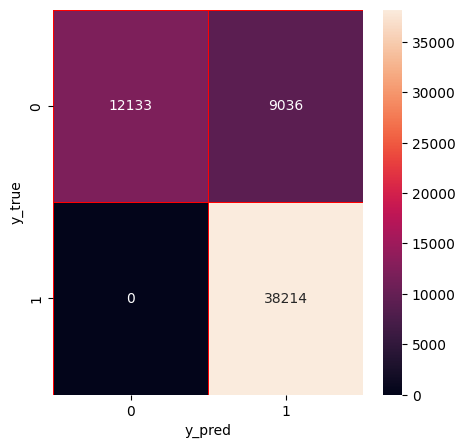

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_fscore_support

# Evaluation metrics
# dt_score = dt.score(X_test, y_test)
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Print results
# print('Accuracy of DT: ' + str(dt_score))
print('Precision of KSQL: ' + str(precision))
print('Recall of KSQL: ' + str(recall))
print('F1-score of KSQL: ' + str(fscore))
print(classification_report(y_true, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()